In [2]:
# Initialize the random number generator
import random
import numpy as np

random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
import h5py

h5f = h5py.File('/content/drive/MyDrive/Colab Notebooks/Project-NN-1/SVHN_single_grey1.h5','r')

h5f.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [5]:
# load the training, test, validation set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]
X_val = h5f['X_val'][:]
y_val = h5f['y_val'][:]

In [6]:
X_val.shape

(60000, 32, 32)

In [7]:
y_val.shape

(60000,)

In [8]:
X_train.shape # train, test splits are 80-20

(42000, 32, 32)

In [9]:
X_test.shape # train, test splits are 80-20

(18000, 32, 32)

In [11]:
import tensorflow as tf
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [12]:
from keras.layers import Dense, Activation
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 32x32 to 1024
model.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

In [13]:
# 1st Hidden layer
model.add(tf.keras.layers.Dense(256, activation='relu'))
# 2nd Hidden layer
model.add(tf.keras.layers.Dense(128, activation='relu'))
# 3rd Hidden layer
model.add(tf.keras.layers.Dense(64, activation='relu'))
# 4th Hidden layer
model.add(tf.keras.layers.Dense(32, activation='relu'))

In [14]:
#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [15]:
#Compile the model
model.compile( optimizer='adam', loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [16]:
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('SVNH_v1.h5', save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)

In [17]:
model.fit(X_train,y_train,          
          validation_data=(X_test,y_test),
          epochs=10,
          batch_size=64, 
          callbacks=[model_checkpoint])

Epoch 1/10
653/657 [============================>.] - ETA: 0s - loss: 1.4269 - accuracy: 0.5265
Epoch 00001: val_accuracy improved from -inf to 0.67172, saving model to SVNH_v1.h5
657/657 [==============================] - 3s 4ms/step - loss: 1.4261 - accuracy: 0.5268 - val_loss: 1.0457 - val_accuracy: 0.6717
Epoch 2/10
649/657 [============================>.] - ETA: 0s - loss: 0.9702 - accuracy: 0.6947
Epoch 00002: val_accuracy improved from 0.67172 to 0.74178, saving model to SVNH_v1.h5
657/657 [==============================] - 3s 4ms/step - loss: 0.9703 - accuracy: 0.6947 - val_loss: 0.8490 - val_accuracy: 0.7418
Epoch 3/10
652/657 [============================>.] - ETA: 0s - loss: 0.8162 - accuracy: 0.7453
Epoch 00003: val_accuracy improved from 0.74178 to 0.77167, saving model to SVNH_v1.h5
657/657 [==============================] - 3s 4ms/step - loss: 0.8164 - accuracy: 0.7453 - val_loss: 0.7550 - val_accuracy: 0.7717
Epoch 4/10
650/657 [============================>.] - ETA: 0s

In [18]:
model.evaluate(X_test,y_test) # model test loss and accuracy

563/563 [==============================] - 1s 2ms/step - loss: 0.5807 - accuracy: 0.8336


[0.580742359161377, 0.8336111307144165]

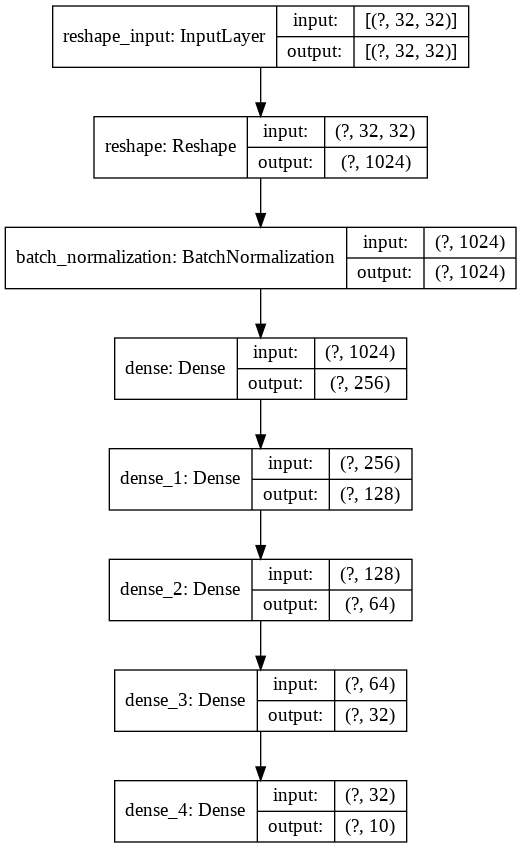

In [19]:
from tensorflow import keras
keras.utils.plot_model(model,"MNIST_Model.png",show_shapes=True)

In [ ]:
!ls -l

total 3684
drwx------ 4 root root    4096 Nov 24 05:20 drive
drwxr-xr-x 1 root root    4096 Nov 13 17:33 sample_data
-rw-r--r-- 1 root root 3760576 Nov 24 06:37 SVNH_v1.h5


In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_8 (Reshape)          (None, 1024)              0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 1024)              4096      
_________________________________________________________________
dense_29 (Dense)             (None, 256)               262400    
_________________________________________________________________
dense_30 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_31 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_32 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_33 (Dense)             (None, 10)               

Prediction label 8
Actual Label 8


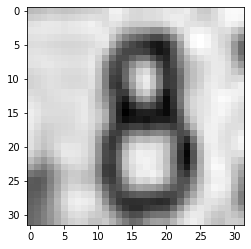

In [ ]:
import matplotlib.pyplot as plt
img_num = np.random.randint(0,X_test.shape[0])
input_data = np.expand_dims(X_test[img_num], axis=0)
pred = model.predict(input_data)
print('Prediction label', np.argmax(pred[0]))
print('Actual Label', np.argmax(y_test[img_num]))
plt.imshow(X_test[img_num],cmap='gray')
plt.show()